# Лабораторная работа 4. Введение в сверточные нейронные сети
Cоздать сверточную нейросеть для классификации набора данных.   

In [1]:
# Импортируюем библиотеки
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import itertools
%matplotlib inline

In [2]:
#Установка параметров моделей и другие глобальные параметры
batch_size = 32  # Размер пакета картинок пропускамой нейронкой во время обучения
num_classes = 10  # Количество классов
epochs = 10       # Количество эпох обучения
data_augmentation = False # Модифицировать данные

In [3]:
# Импорт и предварительная обработка данных
# загрузка данных и разделение их между обучающими и тестовыми наборами
(x_train, y_train), (x_test, y_test) = cifar10.load_data() #Загрузка датасета Cifar10
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

170498071/170498071 [==============================] - 2s 0us/step
x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
50000 train samples
10000 test samples


In [4]:
# Нормализуем данные
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
# Конвертируем массив под "Быстрое кодирование"
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [5]:
# Функция активации нейронов ReLU
# Реализация Dropout


model = Sequential()
# Сверточные фильты => Активация => Сверточные фильты => Активация => Объедининие => Исключение
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# Сверточные фильты => Активация => Сверточные фильты => Активация => Объедининие => Исключение
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# Выравнивание => Сбор => Активация => Исключение
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
# a softmax classifier
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                        

In [6]:
opt = keras.optimizers.legacy.RMSprop(learning_rate=0.0001, decay=1e-6)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [7]:
history = None  # Для записи данных при обучении нейронной сети

history = model.fit(x_train, y_train,  #Обучающая массивы
          batch_size=batch_size,       #Размер потока
          epochs=epochs,               #Эпохи
          validation_data=(x_test, y_test), #Тестировочный массив
          shuffle=True)

Epoch 1/10
1563/1563 [==============================] - 141s 89ms/step - loss: 1.7936 - accuracy: 0.3405 - val_loss: 1.5240 - val_accuracy: 0.4501
Epoch 2/10
1563/1563 [==============================] - 137s 88ms/step - loss: 1.4876 - accuracy: 0.4619 - val_loss: 1.4267 - val_accuracy: 0.4999
Epoch 3/10
1563/1563 [==============================] - 138s 88ms/step - loss: 1.3458 - accuracy: 0.5153 - val_loss: 1.2589 - val_accuracy: 0.5572
Epoch 4/10
1563/1563 [==============================] - 137s 88ms/step - loss: 1.2433 - accuracy: 0.5553 - val_loss: 1.1447 - val_accuracy: 0.5986
Epoch 5/10
1563/1563 [==============================] - 138s 88ms/step - loss: 1.1589 - accuracy: 0.5893 - val_loss: 1.0538 - val_accuracy: 0.6272
Epoch 6/10
1563/1563 [==============================] - 137s 88ms/step - loss: 1.0858 - accuracy: 0.6191 - val_loss: 1.0261 - val_accuracy: 0.6380
Epoch 7/10
1563/1563 [==============================] - 137s 88ms/step - loss: 1.0311 - accuracy: 0.6395 - val_loss: 0

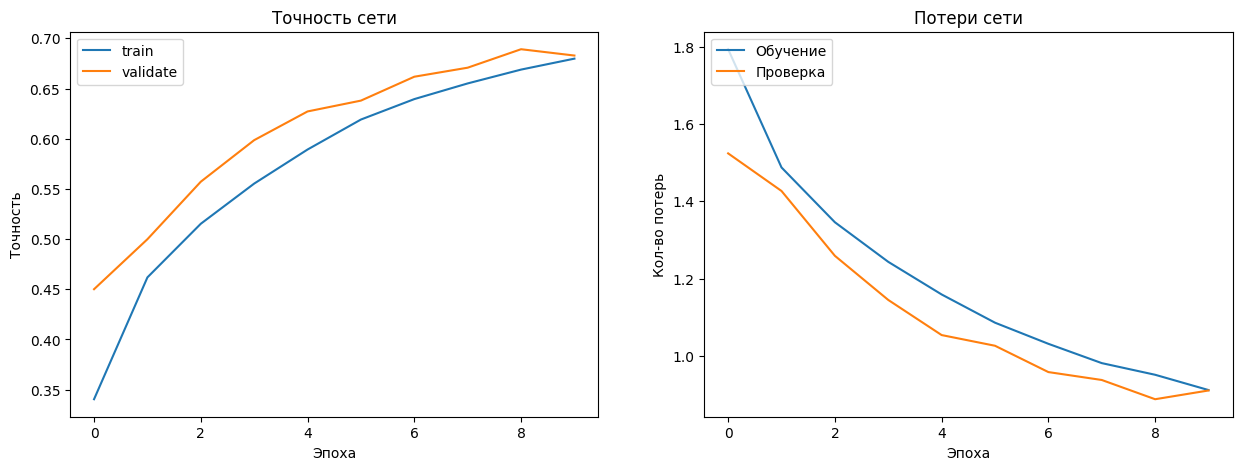

In [8]:
# Оценка сети
def plotmodelhistory(history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # обобщение истории для точности
    axs[0].plot(history.history['accuracy'])
    axs[0].plot(history.history['val_accuracy'])
    axs[0].set_title('Точность сети')
    axs[0].set_ylabel('Точность')
    axs[0].set_xlabel('Эпоха')
    axs[0].legend(['train', 'validate'], loc='upper left')
    # обобщение истории потерь
    axs[1].plot(history.history['loss'])
    axs[1].plot(history.history['val_loss'])
    axs[1].set_title('Потери сети')
    axs[1].set_ylabel('Кол-во потерь')
    axs[1].set_xlabel('Эпоха')
    axs[1].legend(['Обучение', 'Проверка'], loc='upper left')
    plt.show()
plotmodelhistory(history)

In [9]:
# Оценка обученной сети
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])
# Производим прогноз
pred = model.predict(x_test)

313/313 [==============================] - 7s 22ms/step - loss: 0.9104 - accuracy: 0.6829
Test loss: 0.910352349281311
Test accuracy: 0.6829000115394592
313/313 [==============================] - 7s 23ms/step


In [10]:
# Выявление проблем нейронной сети, через матрицу ошибок


def heatmap(data, row_labels, col_labels, ax=None, cbar_kw={}, cbarlabel="", **kwargs):
    if not ax:
        ax = plt.gca()
    # Построим тепловую карту
    im = ax.imshow(data, **kwargs)
    # Создать цветовую панель
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")
    # Пусть маркировка горизонтальных осей появится сверху
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    return im, cbar
def annotate_heatmap(im, data=None, fmt="d", threshold=None):
    # Измените цвет текста в зависимости от данных.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            text = im.axes.text(j, i, format(data[i, j], fmt), horizontalalignment="center",
                                 color="white" if data[i, j] > thresh else "black")
            texts.append(text)
    return texts

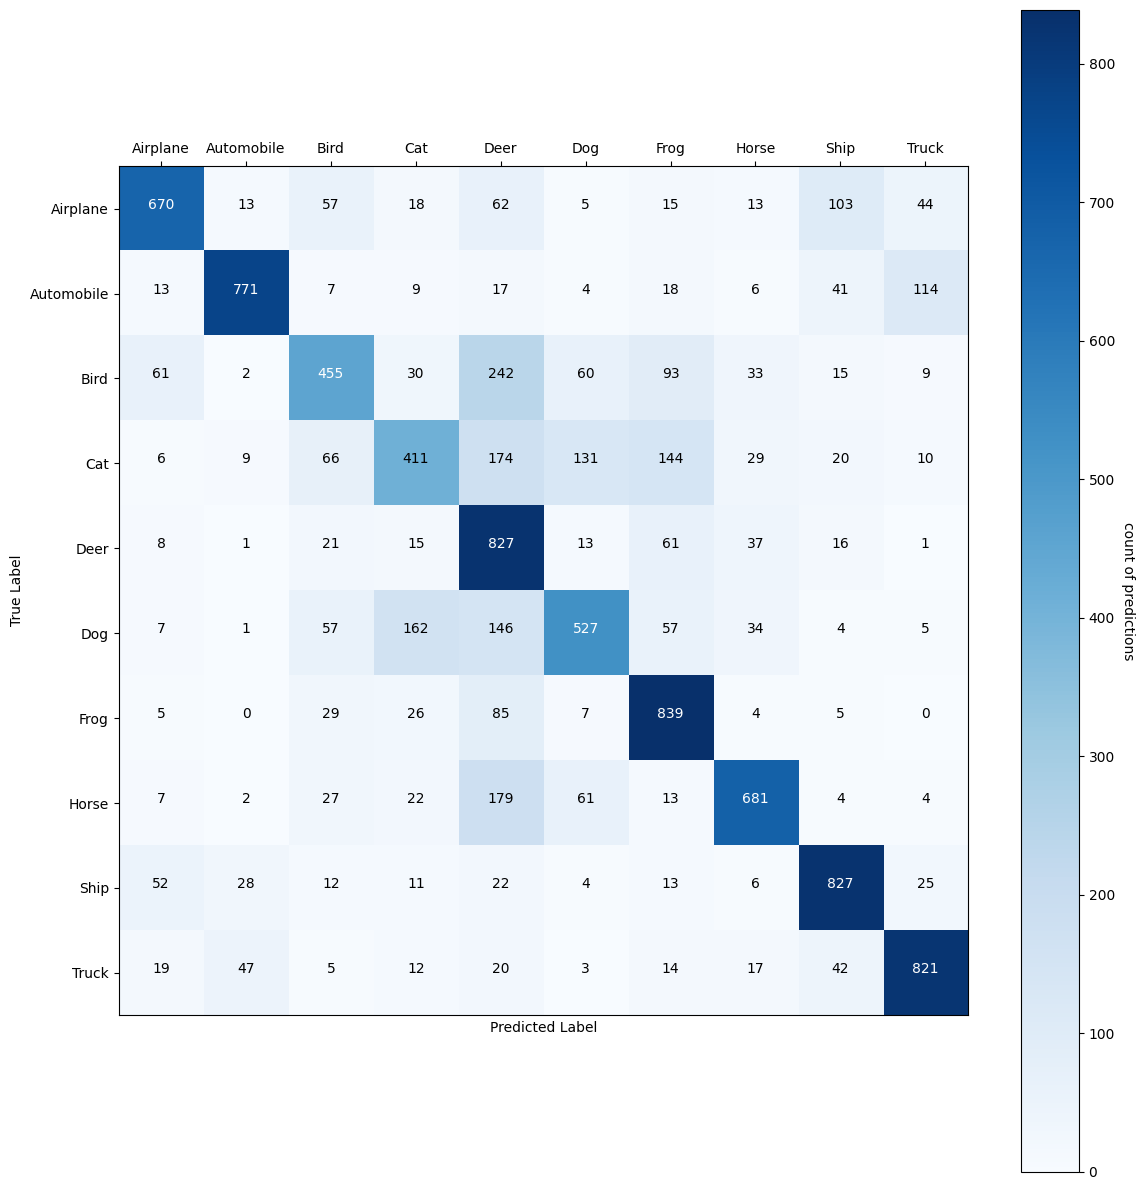

In [11]:
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Преобразовать классы предсказаний в один вектор
Y_pred_classes = np.argmax(pred, axis=1)
# Преобразовать валидационные наблюдения в один вектор
Y_true = np.argmax(y_test, axis=1)
# Ошибки - это разница между предсказанными метками и истинными метками
errors = (Y_pred_classes - Y_true != 0)
Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = pred[errors]
Y_true_errors = Y_true[errors]
X_test_errors = x_test[errors]
cm = confusion_matrix(Y_true, Y_pred_classes)
thresh = cm.max() / 2.
fig, ax = plt.subplots(figsize=(12,12))
im, cbar = heatmap(cm, labels, labels, ax=ax,
                   cmap=plt.cm.Blues, cbarlabel="count of predictions")
texts = annotate_heatmap(im, data=cm, threshold=thresh)
fig.tight_layout()
plt.show()

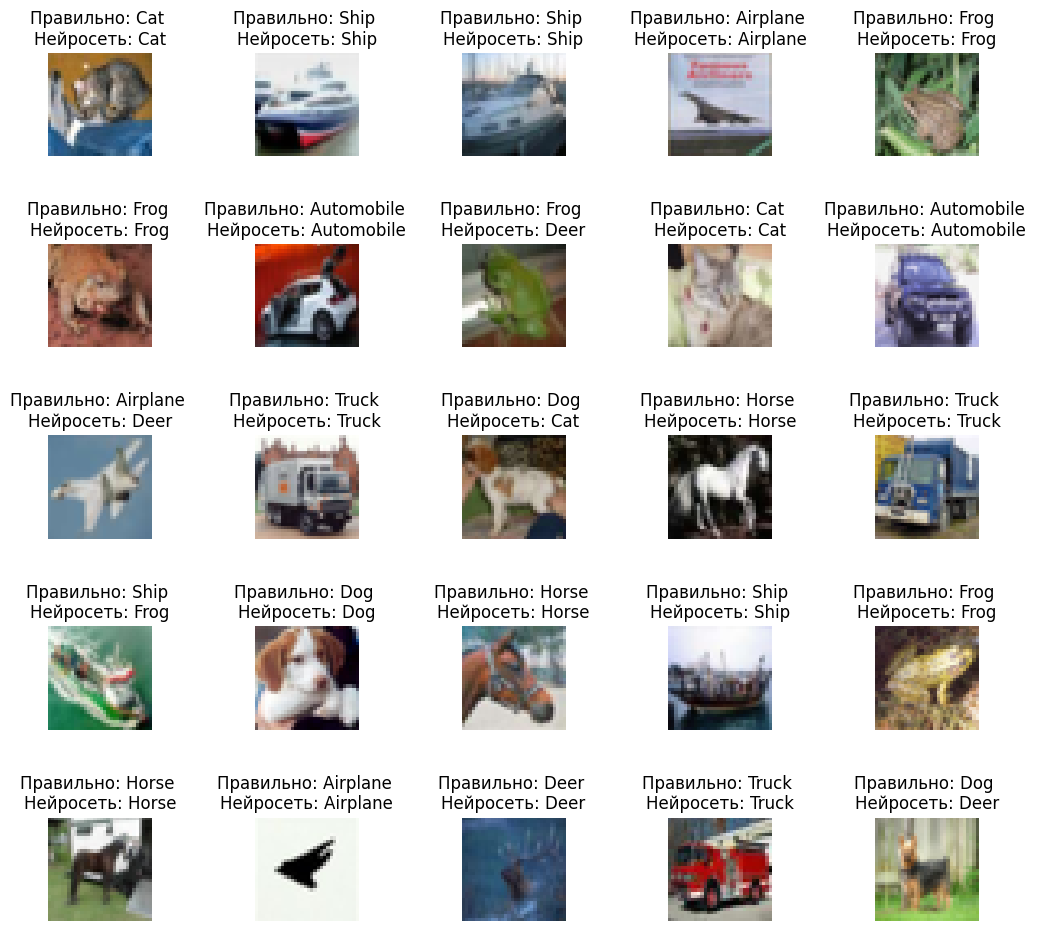

In [12]:
# Проверим предсказания
R = 5
C = 5
fig, axes = plt.subplots(R, C, figsize=(12,12))
axes = axes.ravel()

for i in np.arange(0, R*C):
    axes[i].imshow(x_test[i])
    axes[i].set_title("Правильно: %s \nНейросеть: %s" % (labels[Y_true[i]], labels[Y_pred_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

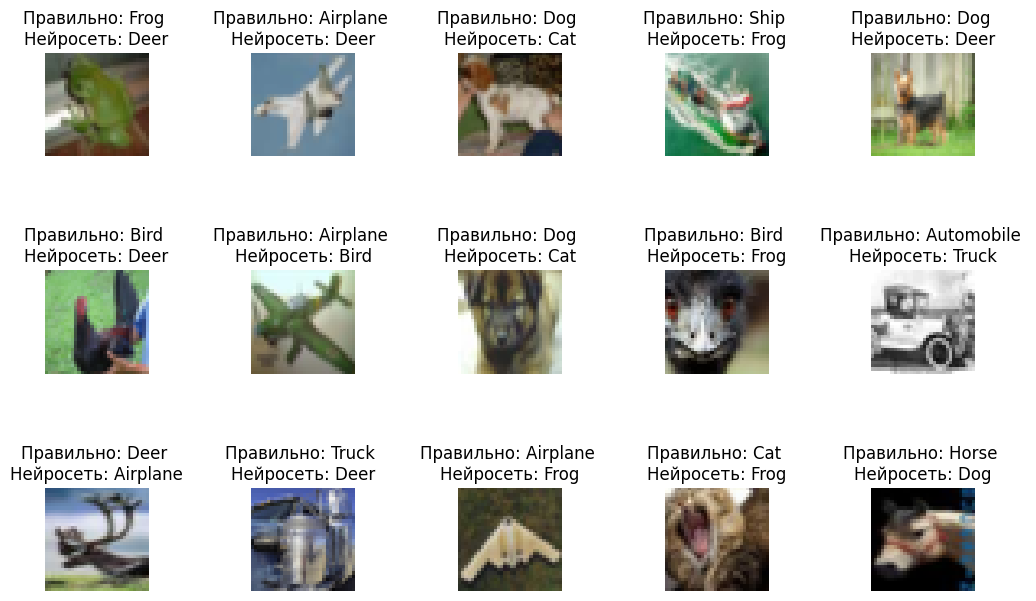

In [13]:
# Проверим ложные предсказания
R = 3
C = 5
fig, axes = plt.subplots(R, C, figsize=(12,8))
axes = axes.ravel()

misclassified_idx = np.where(Y_pred_classes != Y_true)[0]
for i in np.arange(0, R*C):
    axes[i].imshow(x_test[misclassified_idx[i]])
    axes[i].set_title("Правильно: %s \nНейросеть: %s" % (labels[Y_true[misclassified_idx[i]]],
                                                  labels[Y_pred_classes[misclassified_idx[i]]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

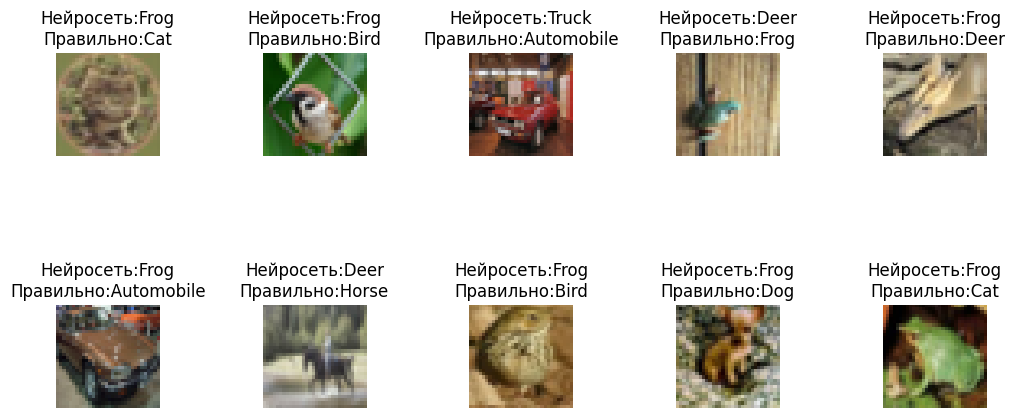

In [14]:
# Проверьте наиболее важные ошибки
def display_errors(errors_index, img_errors, pred_errors, obs_errors):
    # Эта функция показывает 10 изображений с их предсказанными и реальными метками
    n = 0
    nrows = 2
    ncols = 5
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True, figsize=(12,6))
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((32,32,3)))
            ax[row,col].set_title("Нейросеть:{}\nПравильно:{}".
                                  format(labels[pred_errors[error]],labels[obs_errors[error]]))
            n += 1
            ax[row,col].axis('off')
            plt.subplots_adjust(wspace=1)
# Вероятности неправильных предсказанных чисел
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)
# Предсказанные вероятности истинных значений в наборе ошибок
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))
# Разница между вероятностью предсказанной метки и истинной меткой
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors
# Отсортированный список ошибок дельта-задачи
sorted_dela_errors = np.argsort(delta_pred_true_errors)
# Топ-10 ошибок
most_important_errors = sorted_dela_errors[-10:]
# Показать топ-10 ошибок
display_errors(most_important_errors, X_test_errors, Y_pred_classes_errors, Y_true_errors)

In [15]:
def show_test(number):
    fig = plt.figure(figsize = (3,3))
    test_image = np.expand_dims(x_test[number], axis=0)
    test_result = model.predict_classes(test_image)
    plt.imshow(x_test[number])
    dict_key = test_result[0]
    plt.title("Predicted: {} \nTrue Label: {}".format(labels[dict_key],
                                                      labels[Y_true[number]]))

In [16]:
def show_test(number):
    fig = plt.figure(figsize = (3,3))
    test_image = np.expand_dims(x_test[number], axis=0)
    test_result = model.predict(test_image)
    plt.imshow(x_test[number])
    dict_key = test_result[0]
    print(dict_key)
    print(labels[Y_true[number]])

1/1 [==============================] - 0s 37ms/step
[0.0031932  0.92756826 0.00150591 0.00825205 0.00142557 0.00232141
 0.0032827  0.00257835 0.00100978 0.04886289]
Automobile


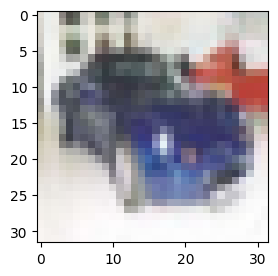

In [19]:
show_test(134)


Вывод о улучшении качества нейронной сети

* Качество можно повысить проведением обучения нейнной сети порядком 50 эпох, но в данном примере было проведено 10 эпох обучения нейронной сети, однако тогда  обучение займет много времение - 5 мин на эпоху и качество нейронной сети составит 87%. Дальнейшие эпохи будут переобучать нейронную сеть.
* Для лучшего качества необходимо правильно сжимать картинку до **32 x 32** пикселя без значительной потери качества картинки.
